# Library imports

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data & Visualization functions

In [9]:
def load_data(filename):
    filepath = "./data/" + filename
    return np.loadtxt(filepath)

In [48]:
def load_spike_pattern(index, root_pattern):
    file = root_pattern + str(index) + '.txt'
    return np.loadtxt(file)

In [16]:
 def visualize_spikes(data, frame_size=(20,10)):
    '''
    input: data -- np.array([time_spike, num_spike]) 
    num_spike: indexed neuron numbers. 
        1-300   are excitatory.
        300-400 are inhibitory
    
    function: print the scatterplot
    '''
    plt.rcParams["figure.figsize"] = frame_size
    neuron_types = np.zeros(len(data))
    neuron_types[np.where(data[:, 1] > 300)] = 1
#      print('data[:, 1]', data[:, 1])
#      print('neuron_types', np.where(data[:, 1] > 300))
    neuron_types = neuron_types.reshape(-1, 1)
    data = np.concatenate((data, neuron_types), axis=1)
    df = pd.DataFrame(data, columns=["time", "neuron index", "type"])
#      print('df', df)
    sns.scatterplot(x="time", y="neuron index", data=df, hue="type",style="type", \
s=10)

In [40]:
def plot_hist(data_bins, title):
    '''
    data_bins: np.array([400])
    '''
    xs = list(range(200))
    # sum of I and E spikes
    bins_total = data_bins[:200] + data_bins[200:]
    sns.barplot(xs, bins_total, color='red')
    sns.barplot(xs, data_bins[:200], color='blue')
    plt.title(title)

## PyTorch Neural Network

In [ ]:
class 

# User-space

In [11]:
## BASH COMMAND
!cd data && ls

spikes_HitI200.txt


## Divergence
How different these scatterplots look as we vary the `HitI` delay time parameter? 

We'll plot the maximum vs the minimum `HitI`.

In [60]:
filename = "varyHitI_2000.txt"
data = load_data(filename)

In [61]:
max_i = np.argmax(data[:,0])
min_i = np.argmin(data[:,0])

print('max_i', max_i, data[max_i, 0])
print('min_i', min_i, data[min_i, 0])

bins_max = data[max_i, 1:]
bins_min = data[min_i, 1:]

max_i 11 489.427
min_i 5 127.38


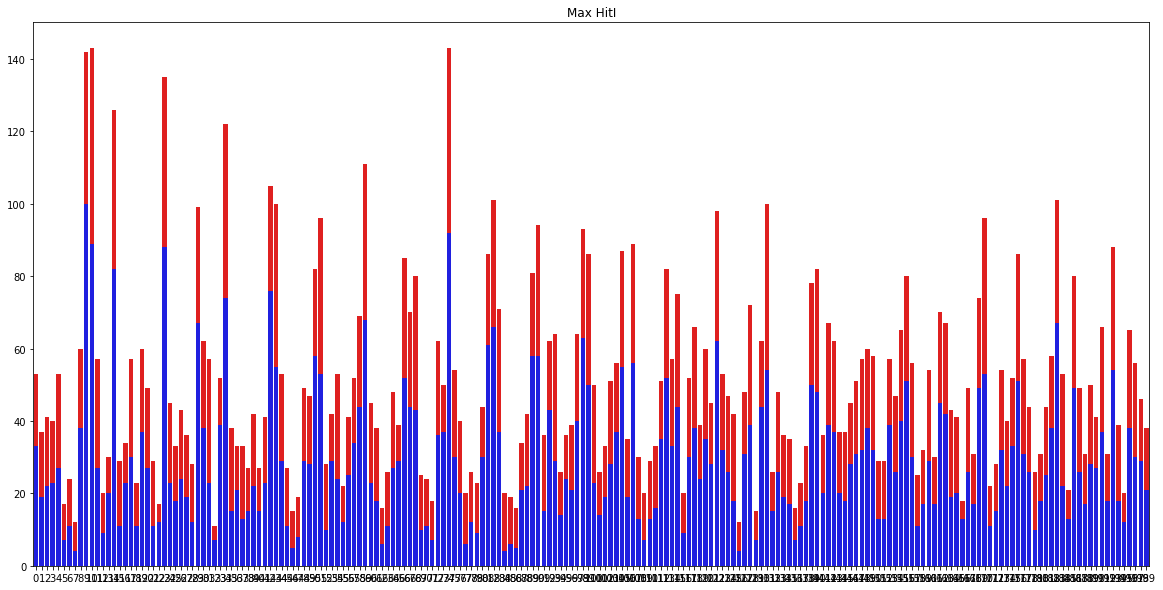

In [62]:
plot_hist(bins_max, 'Max HitI')

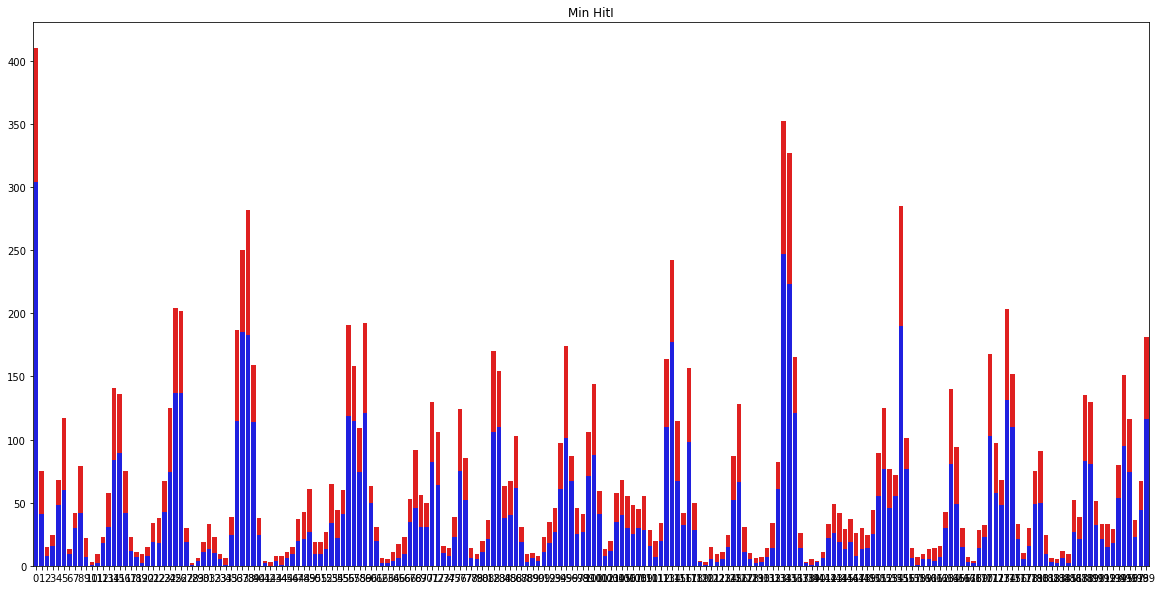

In [63]:
plot_hist(bins_min, 'Min HitI')

In [64]:
root_pattern = "./data/varyHitI"
data_max = load_spike_pattern(max_i, root_pattern)
data_min = load_spike_pattern(min_i, root_pattern)

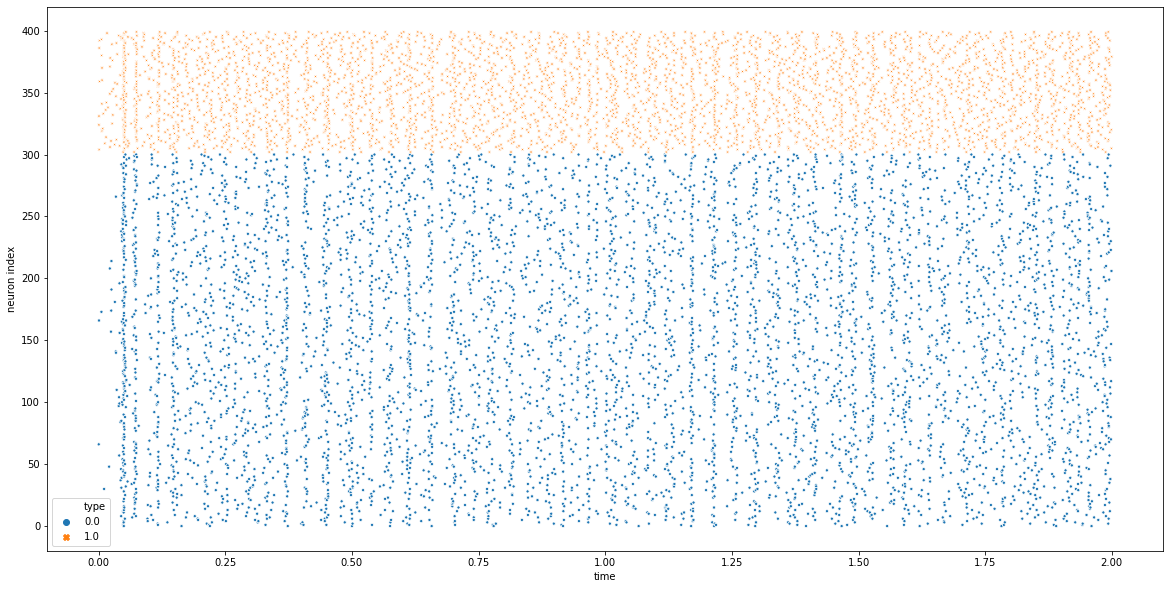

In [65]:
visualize_spikes(data_max)

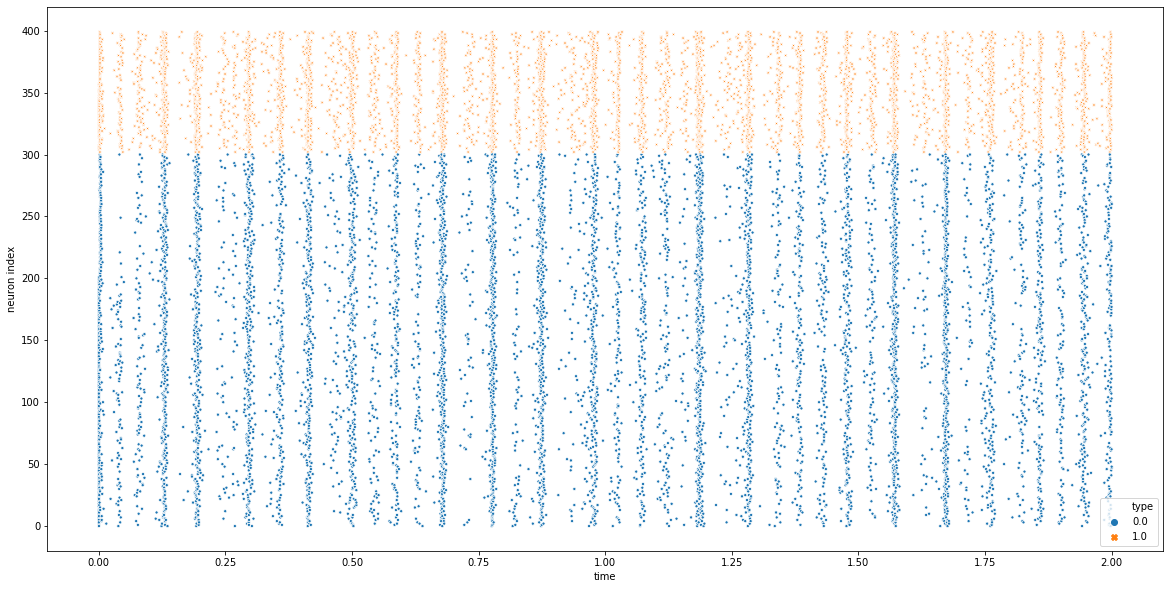

In [66]:
visualize_spikes(data_min)